## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [25]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [26]:
customer_set = pd.read_csv("./Mall_Customers.csv")
customer_set = customer_set.rename(index=str, columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})

**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [27]:
print("Dataset Attributes:")
display(customer_set.head(0))

print(f"Dataset Dimension: {customer_set.shape}")
print("Statistical Information:")
display(customer_set.describe())

print("Data Types:\n")
display(customer_set.info())

print("Checking for Missing Values:")
display(customer_set.isnull().sum())


Dataset Attributes:


,CustomerID,Gender,Age,Income,SpendingScore


Dataset Dimension: (200, 5)
Statistical Information:


,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Data Types:

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


None

Checking for Missing Values:


CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [28]:
customer_set = customer_set.drop("CustomerID", axis="columns")

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

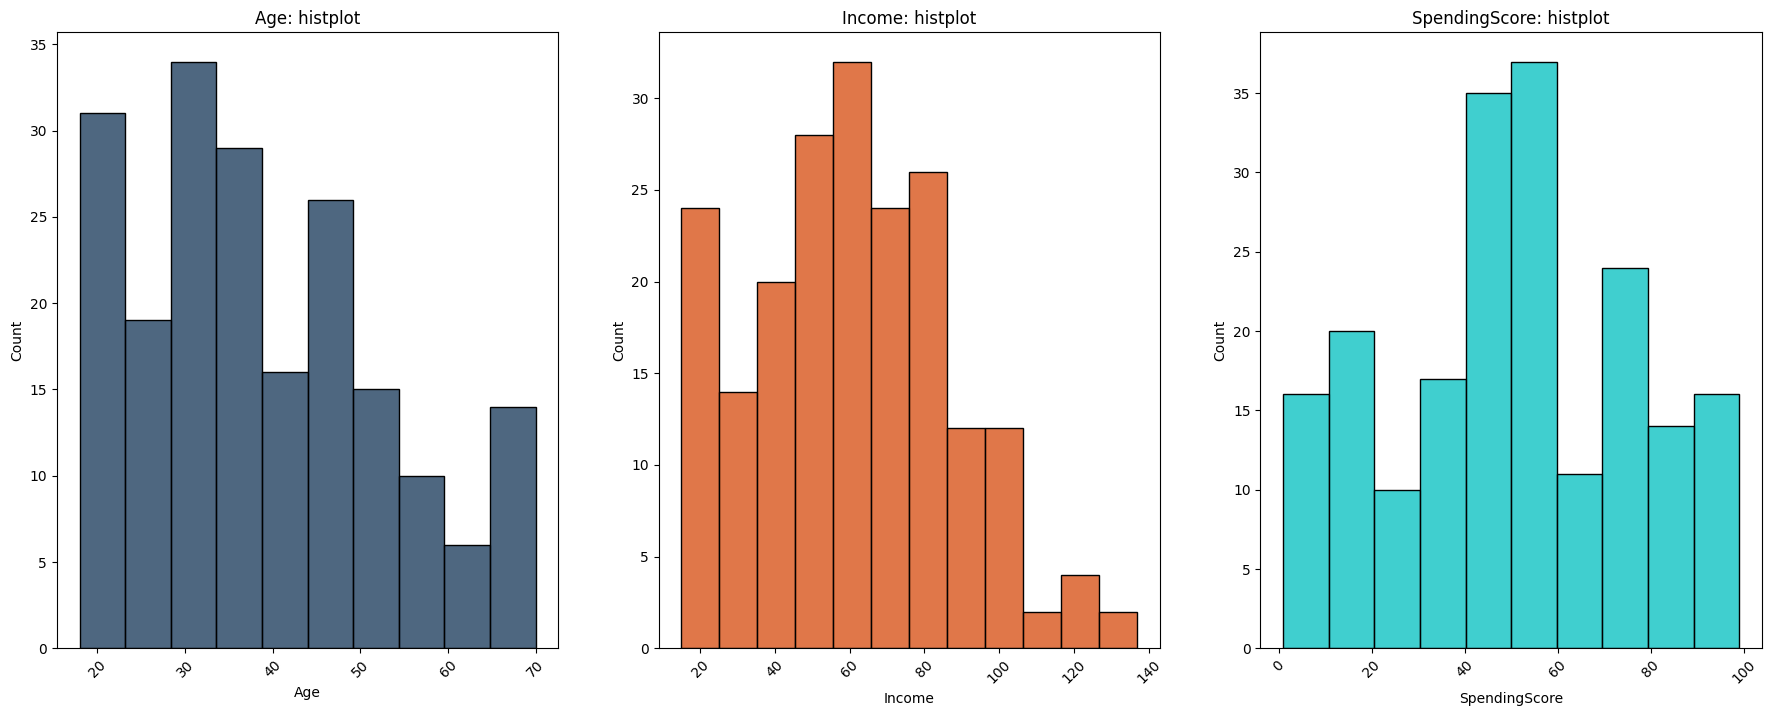

In [29]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(22, 8))

sns.histplot(data=customer_set, x="Age", ax=ax1, color="#123456", bins=10)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Age: histplot")

sns.histplot(data=customer_set, x="Income", ax=ax2, color="#d64a0c", bins=12)
ax2.tick_params(axis='x', rotation=45)
ax2.set_title("Income: histplot")

sns.histplot(data=customer_set, x="SpendingScore", ax=ax3, color="c", bins=10)
ax3.tick_params(axis='x', rotation=45)
ax3.set_title("SpendingScore: histplot")

plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

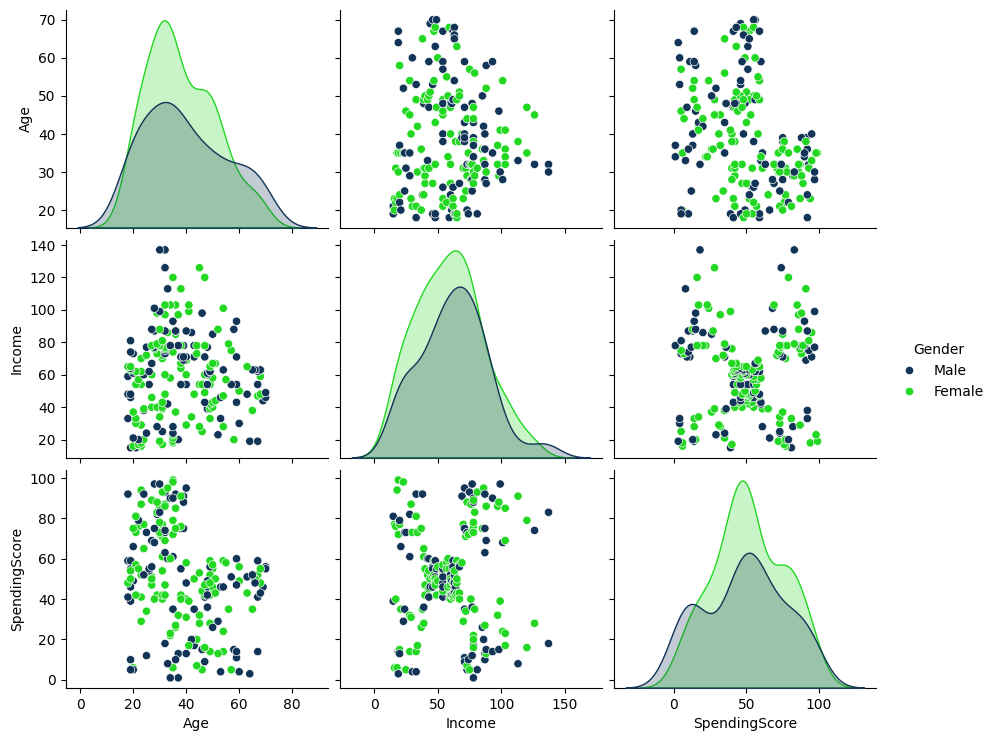

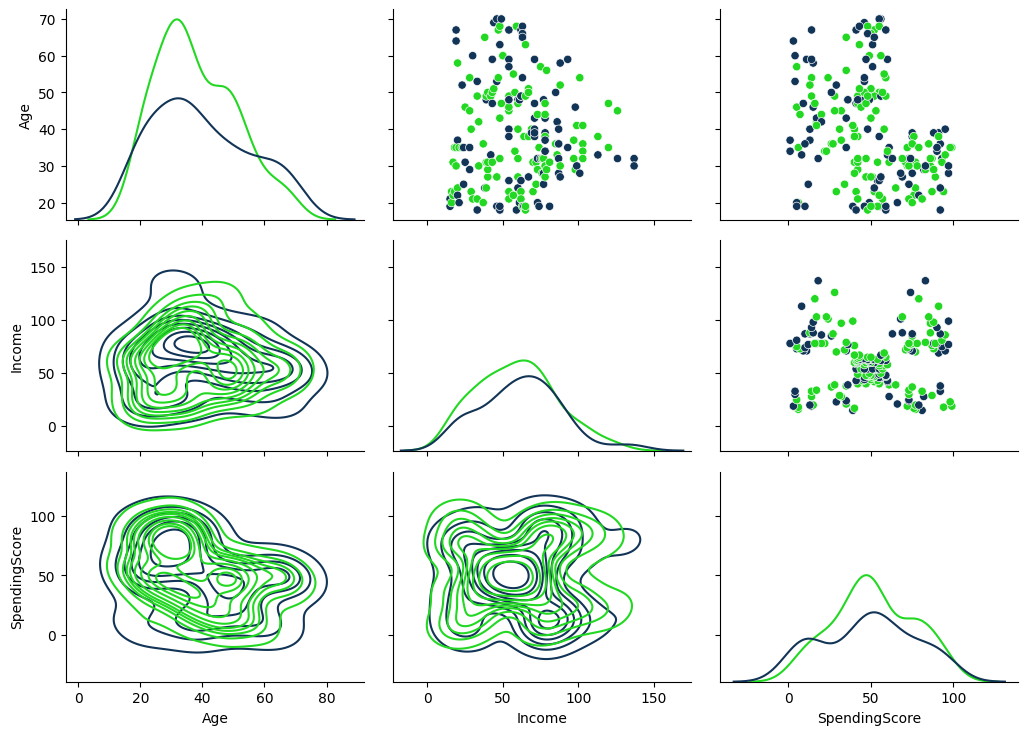

In [30]:
customer_pairplot = sns.pairplot(customer_set, hue="Gender", palette=["#123456", "#22d822"], aspect=1.2)
plt.show()

customer_pairgrid = sns.PairGrid(customer_set, hue="Gender", palette=["#123456", "#22d822"], aspect=1.4)
customer_pairgrid.map_upper(sns.scatterplot)
customer_pairgrid.map_diag(sns.kdeplot)
customer_pairgrid.map_lower(sns.kdeplot, lw=1)
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. В датасеті є тільки 4 атрибути: CustomerID	Gender	Age	Income	SpendingScore. Пропуски відсутні. Розмір датасету (200, 5). Вік: найбільша кількість людей у віці 18-25 років та 30-35 років, а найменше - віком від 60 до 65 років. Дохід: найбільше число людей з річним доходом від 50 до 70 тис., тоді як найменше - в діапазоні від 110 до 120 тис. Spending Score: найбільша кількість людей має показник витрат в діапазоні від 40 до 60, а найменше - в діапазонах 20-30 та 60-70. Групування за атрибутом статі показує схожі розподіли жінок і чоловіків у кожній з пар залежностей. Аналізуючи пару атрибутів "Витрати" та "Дохід", можна відзначити наявність 5 різних груп. На графіках ядерних оцінок є видимі 3 групи, які формуються для пар атрибутів "Витрати" та "Вік" та "Дохід" та "Вік".





**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender
Female    56.0
Male      44.0
Name: count, dtype: float64

Female to Male Ratio:
1.272727272727273


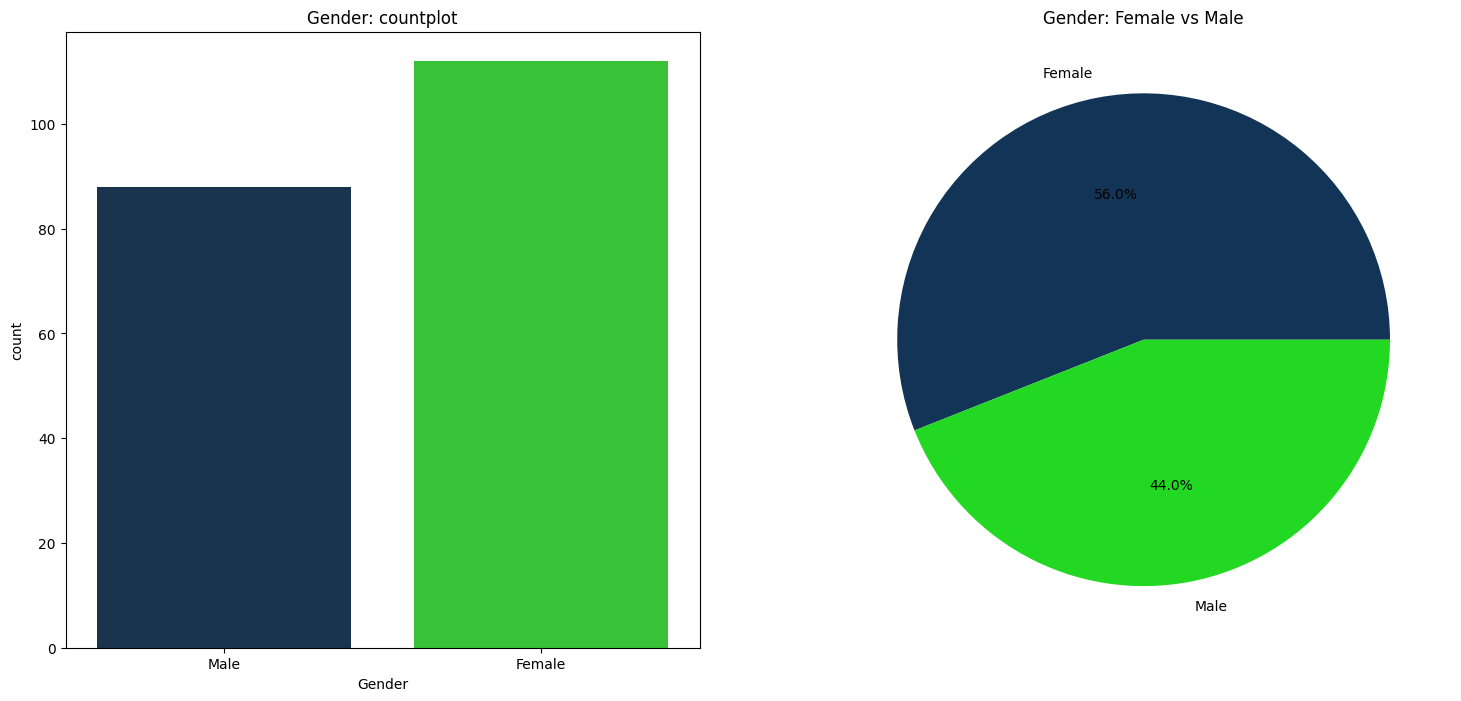

In [31]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 8))

gender_stats = (customer_set["Gender"].value_counts() / customer_set["Gender"].value_counts().sum()) * 100
gender_ratio = gender_stats["Female"] / gender_stats["Male"]

display(gender_stats)

print("Female to Male Ratio:")
print(gender_ratio)

sns.countplot(customer_set, x="Gender", palette=['#123456', '#22d822'], ax=ax1)
ax1.set_title("Gender: countplot")

ax2.pie(gender_stats, labels=["Female", "Male"], autopct='%1.1f%%', colors=['#123456', '#22d822'])
ax2.set_title("Gender: Female vs Male")

plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

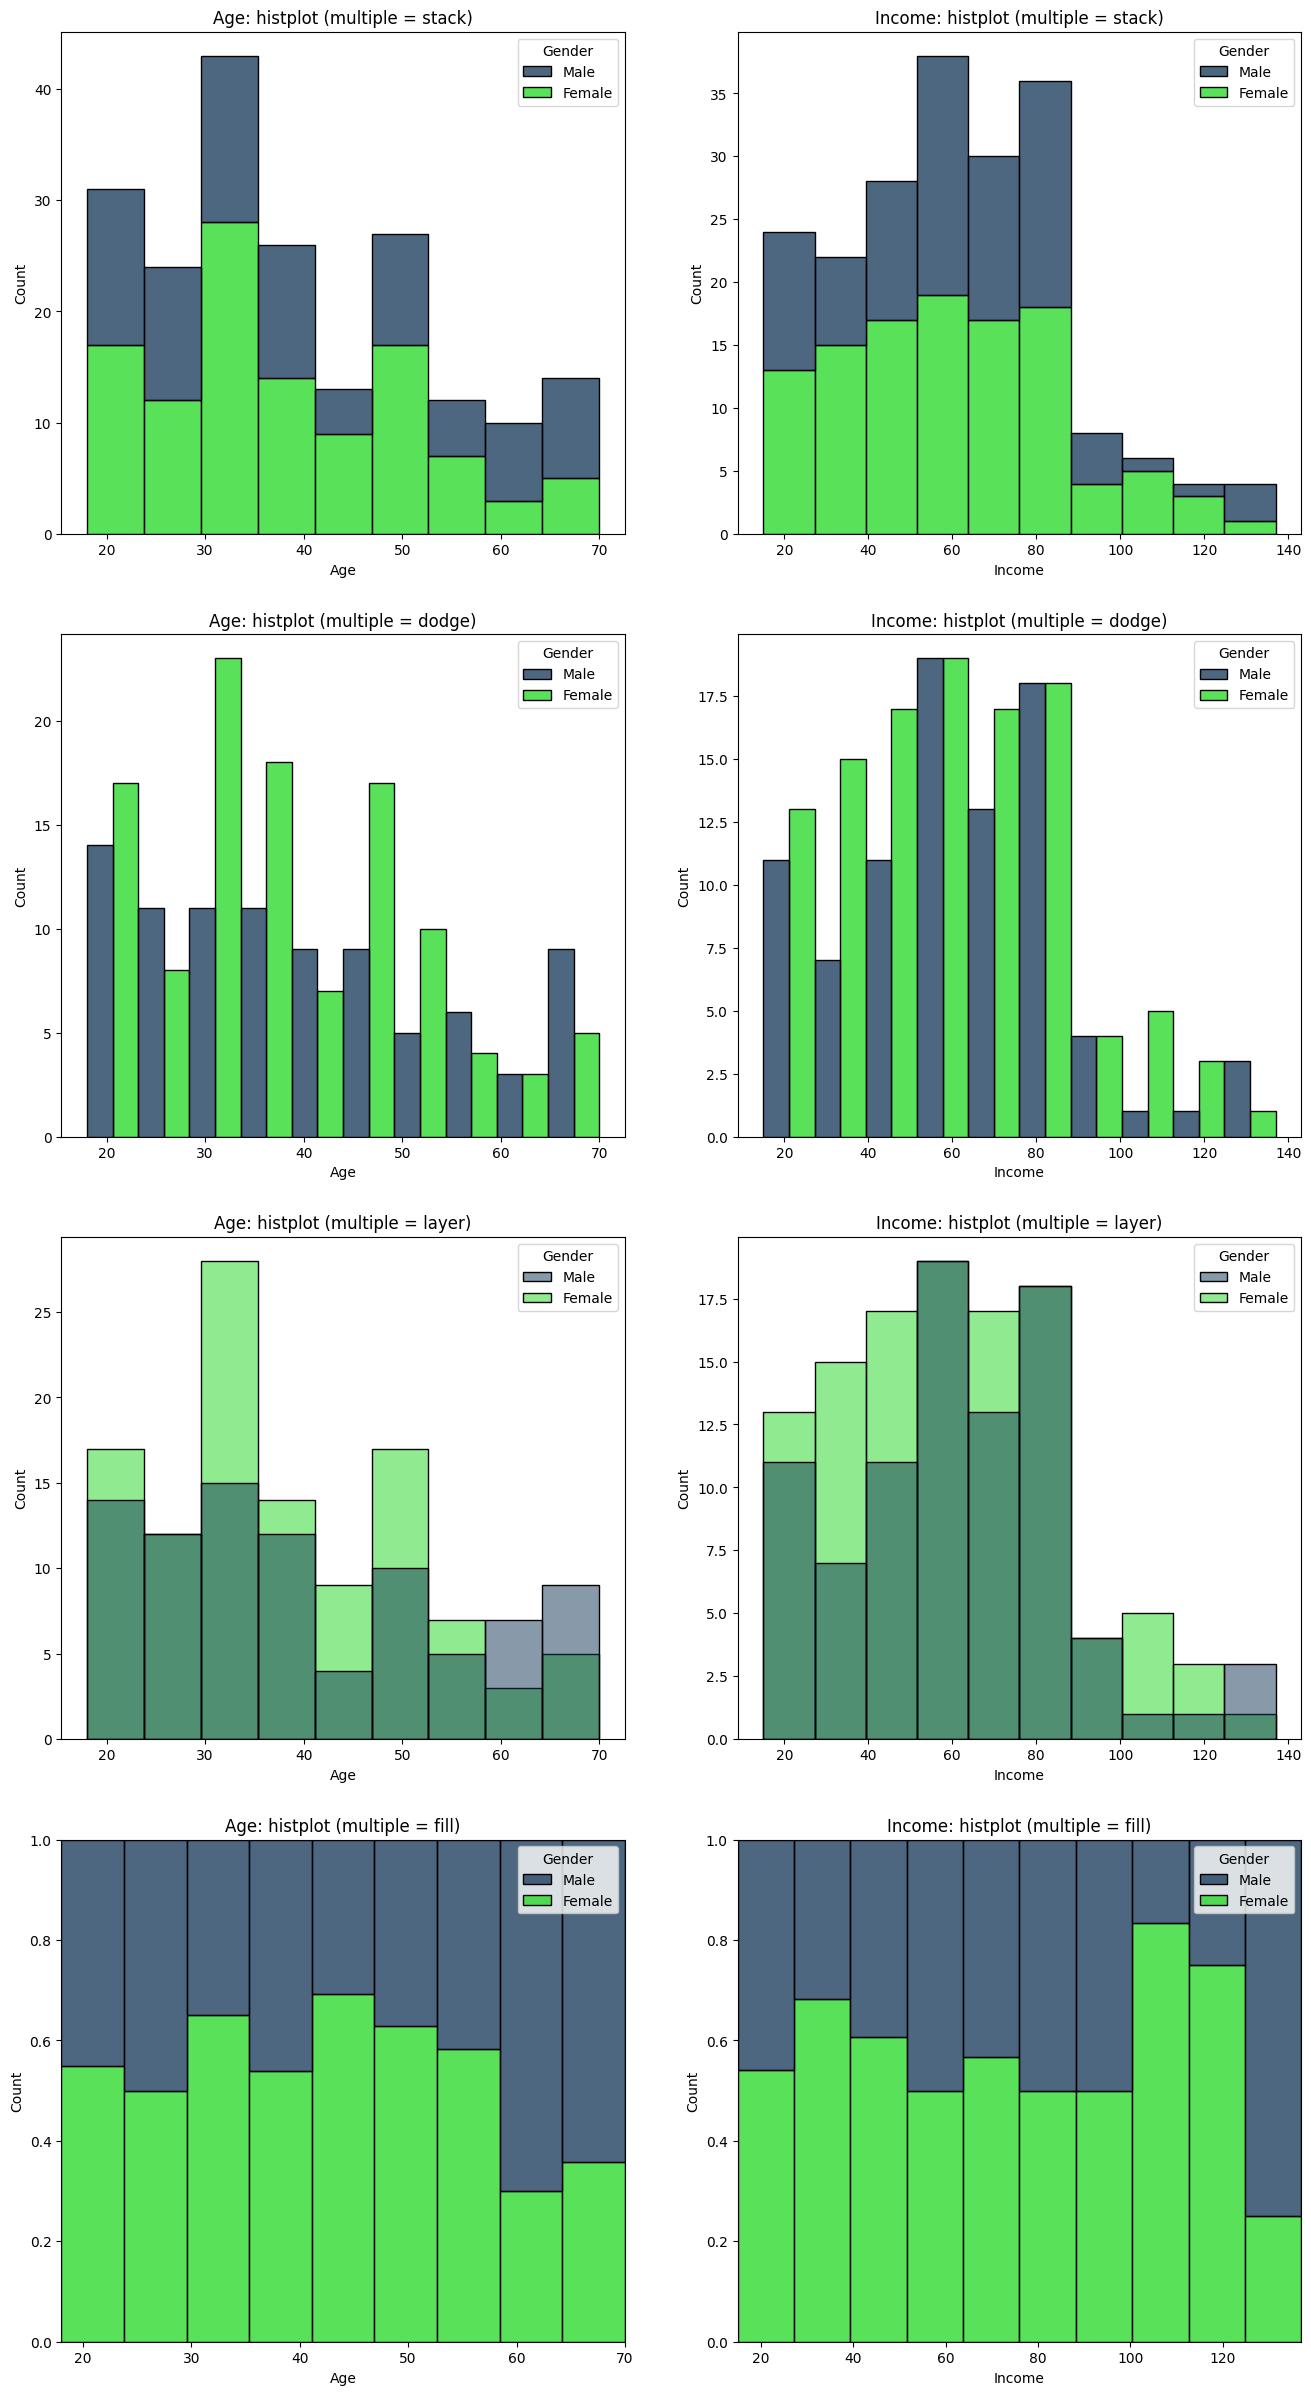

In [32]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 30))

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax1, palette=['#123456', '#22d822'], multiple="stack")
ax1.set_title("Age: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax2, palette=['#123456', '#22d822'], multiple="stack")
ax2.set_title("Income: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax3, palette=['#123456', '#22d822'], multiple="dodge", bins=10)
ax3.set_title("Age: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax4, palette=['#123456', '#22d822'], multiple="dodge", bins=10)
ax4.set_title("Income: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax5, palette=['#123456', '#22d822'], multiple="layer")
ax5.set_title("Age: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax6, palette=['#123456', '#22d822'], multiple="layer")
ax6.set_title("Income: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax7, palette=['#123456', '#22d822'], multiple="fill")
ax7.set_title("Age: histplot (multiple = fill)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax8, palette=['#123456', '#22d822'], multiple="fill")
ax8.set_title("Income: histplot (multiple = fill)")

plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



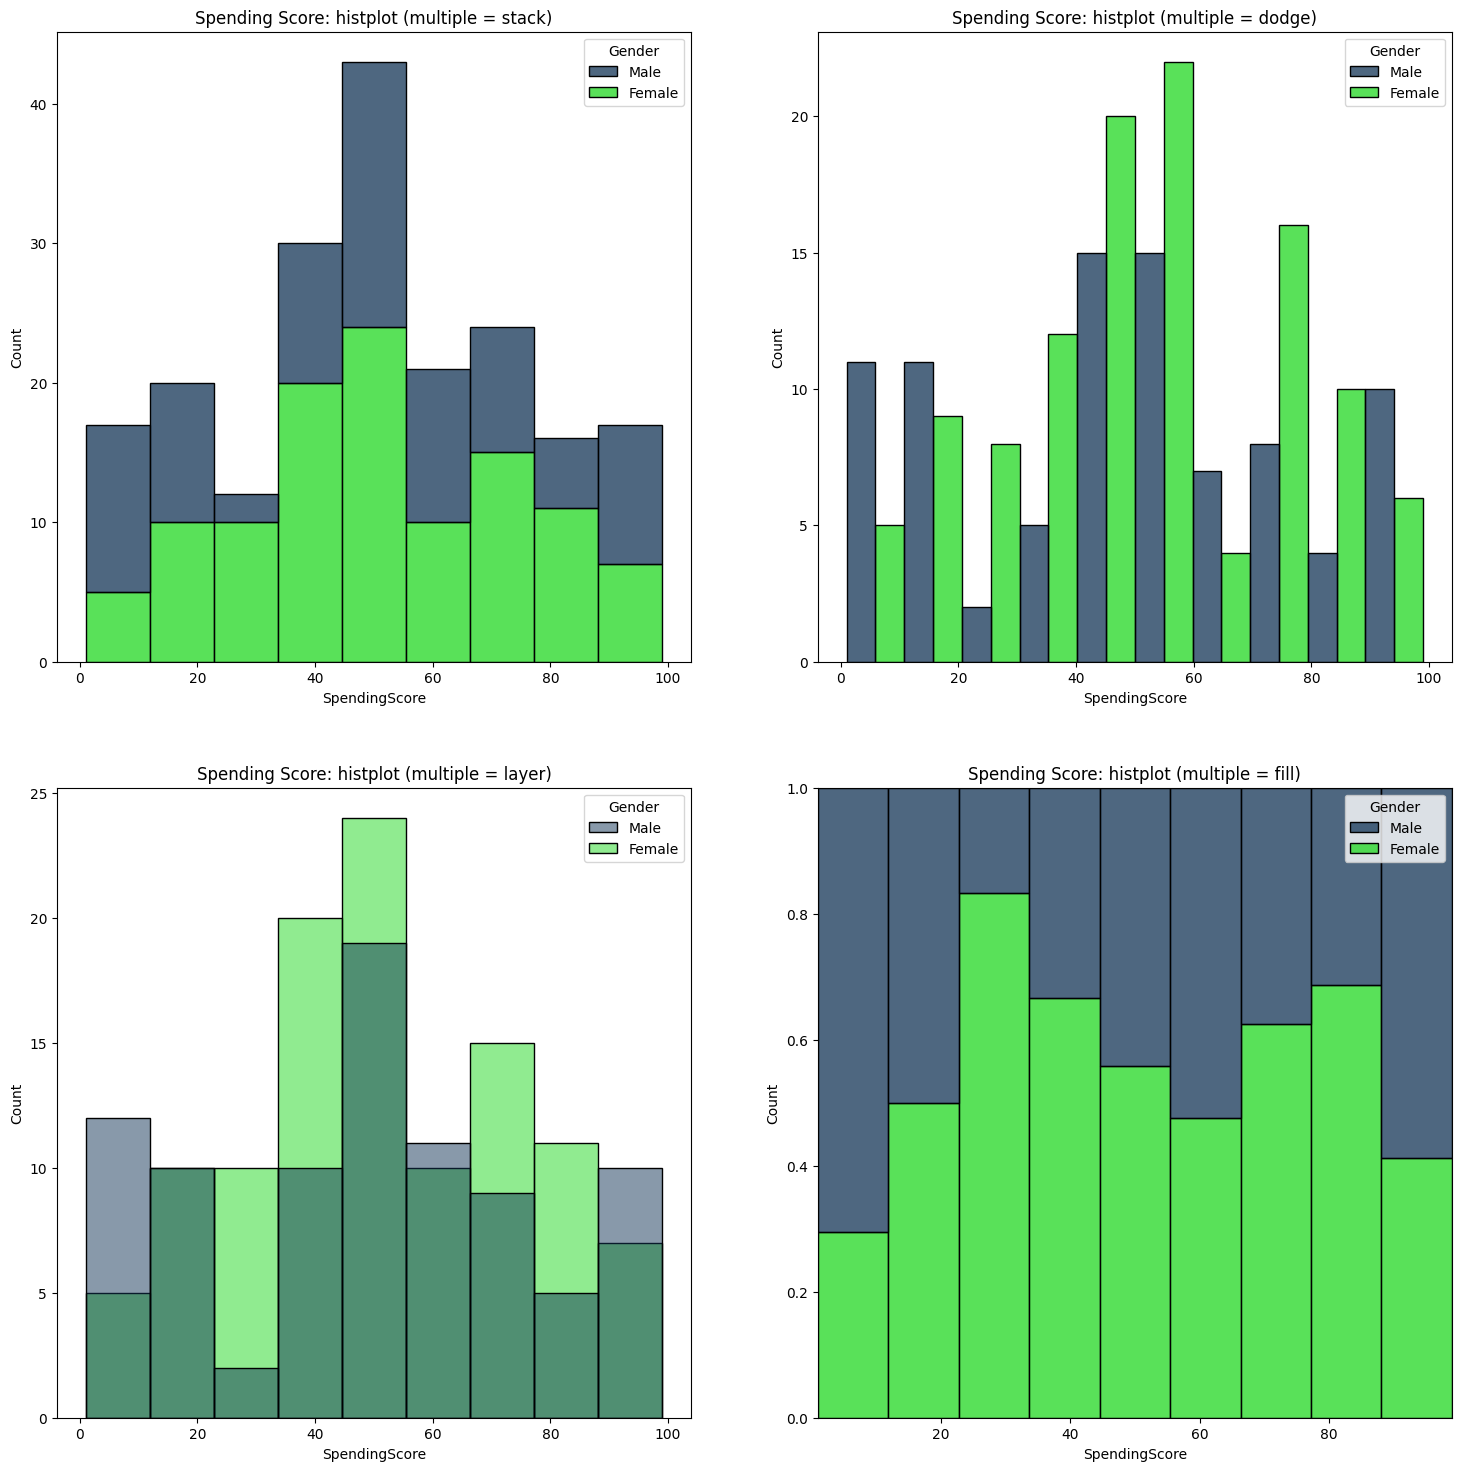

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 18))

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax1, palette=['#123456', '#22d822'], multiple="stack")
ax1.set_title("Spending Score: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax2, palette=['#123456', '#22d822'], multiple="dodge", bins=10)
ax2.set_title("Spending Score: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax3, palette=['#123456', '#22d822'], multiple="layer")
ax3.set_title("Spending Score: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax4, palette=['#123456', '#22d822'], multiple="fill")
ax4.set_title("Spending Score: histplot (multiple = fill)")

plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

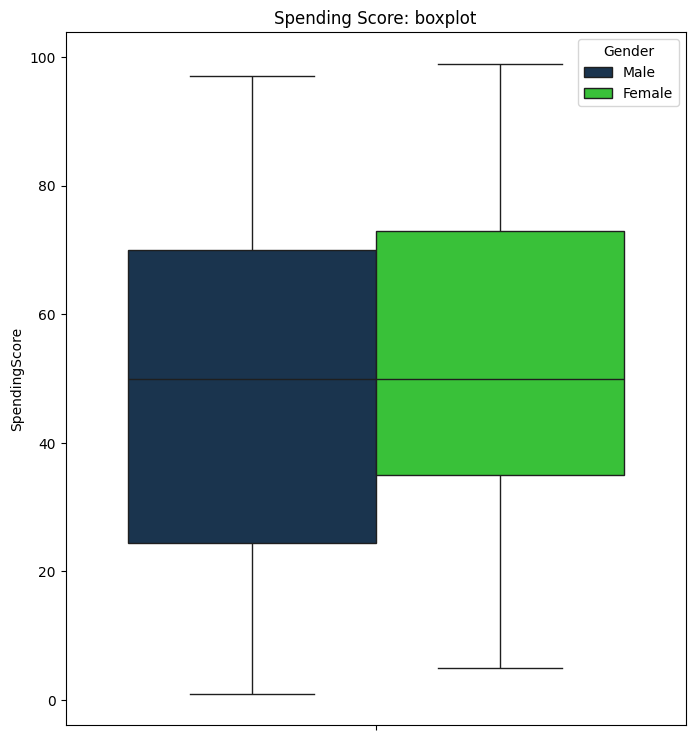

In [34]:
fig, ax1 = plt.subplots(figsize=(8, 9))

sns.boxplot(data=customer_set, y="SpendingScore", ax=ax1, palette=['#123456', '#22d822'], hue="Gender")
ax1.set_title("Spending Score: boxplot")

plt.show()

**Висновки з завдання 5 - 8(детальні)**

1. **Яке співвідношення груп чоловіків та жінок?** 

Жінок більше за чоловіків в 1.27 рази.

2. **Подивитись які можна виділити групи і як розподілені витрати відностно статі людини?**

За допомогою боксплота можна побачити, що середня сума витрат у жінок перевищує витрати у чоловіків, а також мінімальні витрати у жінок є вищими, ніж у чоловіків.

3. **Чи є різниця між витратами у чоловіків та жінок?**

Розглядаючи розподіл річного доходу між жінками та чоловіками, помітно, що жінки переважають практично на всьому графіку. Проте, кількість чоловіків із доходом у 130-140 тис. перевищує кількість жінок. Модою для обох статей є дохід в 50-65 тис. та 75-90 тис.


## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

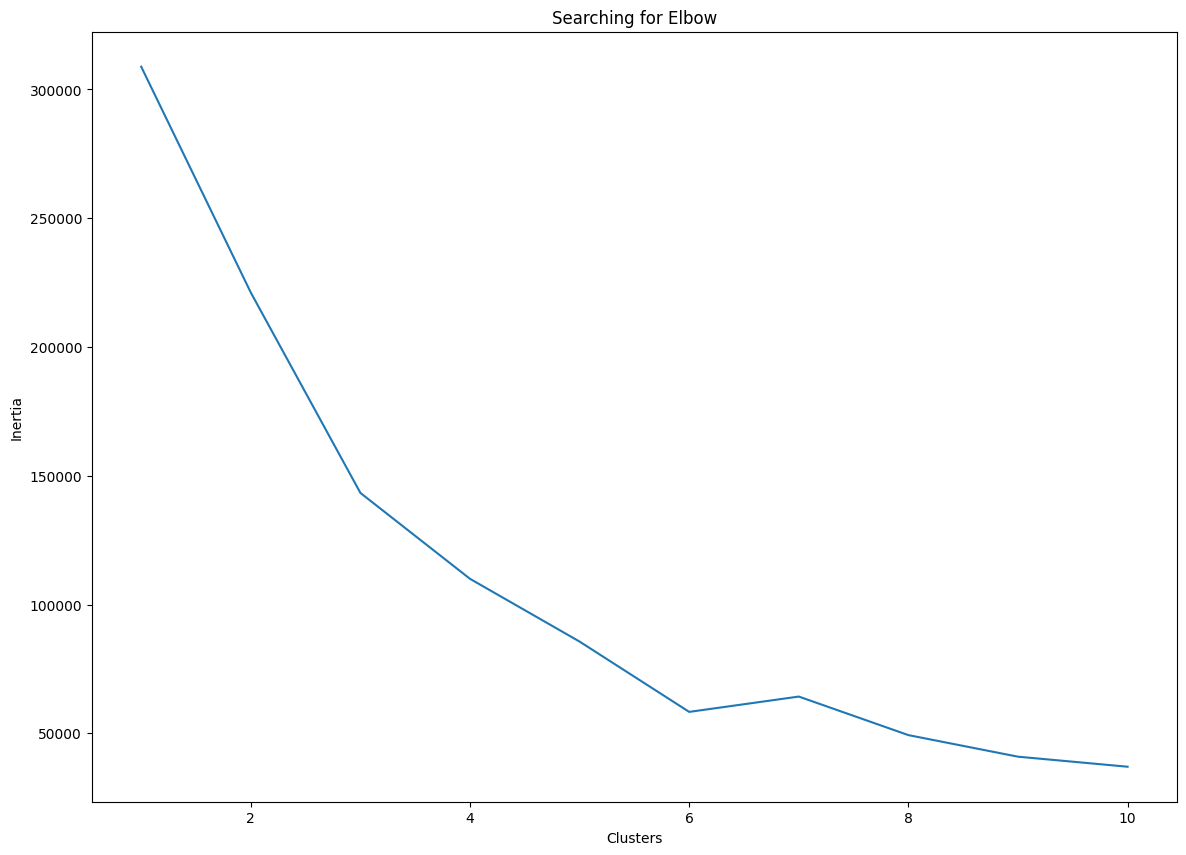

In [35]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

1.  В методі Elbow виявлено чіткі лікті при 3, 5 і 6 кластерах. Ці значення кількості кластерів виразні і можуть бути оптимальними. Скатерплоти також вказують на можливість використання 3 або 5 кластерів. Я вибрав 6 кластерів як оптимальний варіант. Вирішив вилучити атрибут Gender, оскільки він не має чіткої кореляції з іншими атрибутами і не впливає на кластеризацію. Крім того, ми вже встановили залежність між доходом і витратами, що робить їх ключовими для визначення кластерів.




**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

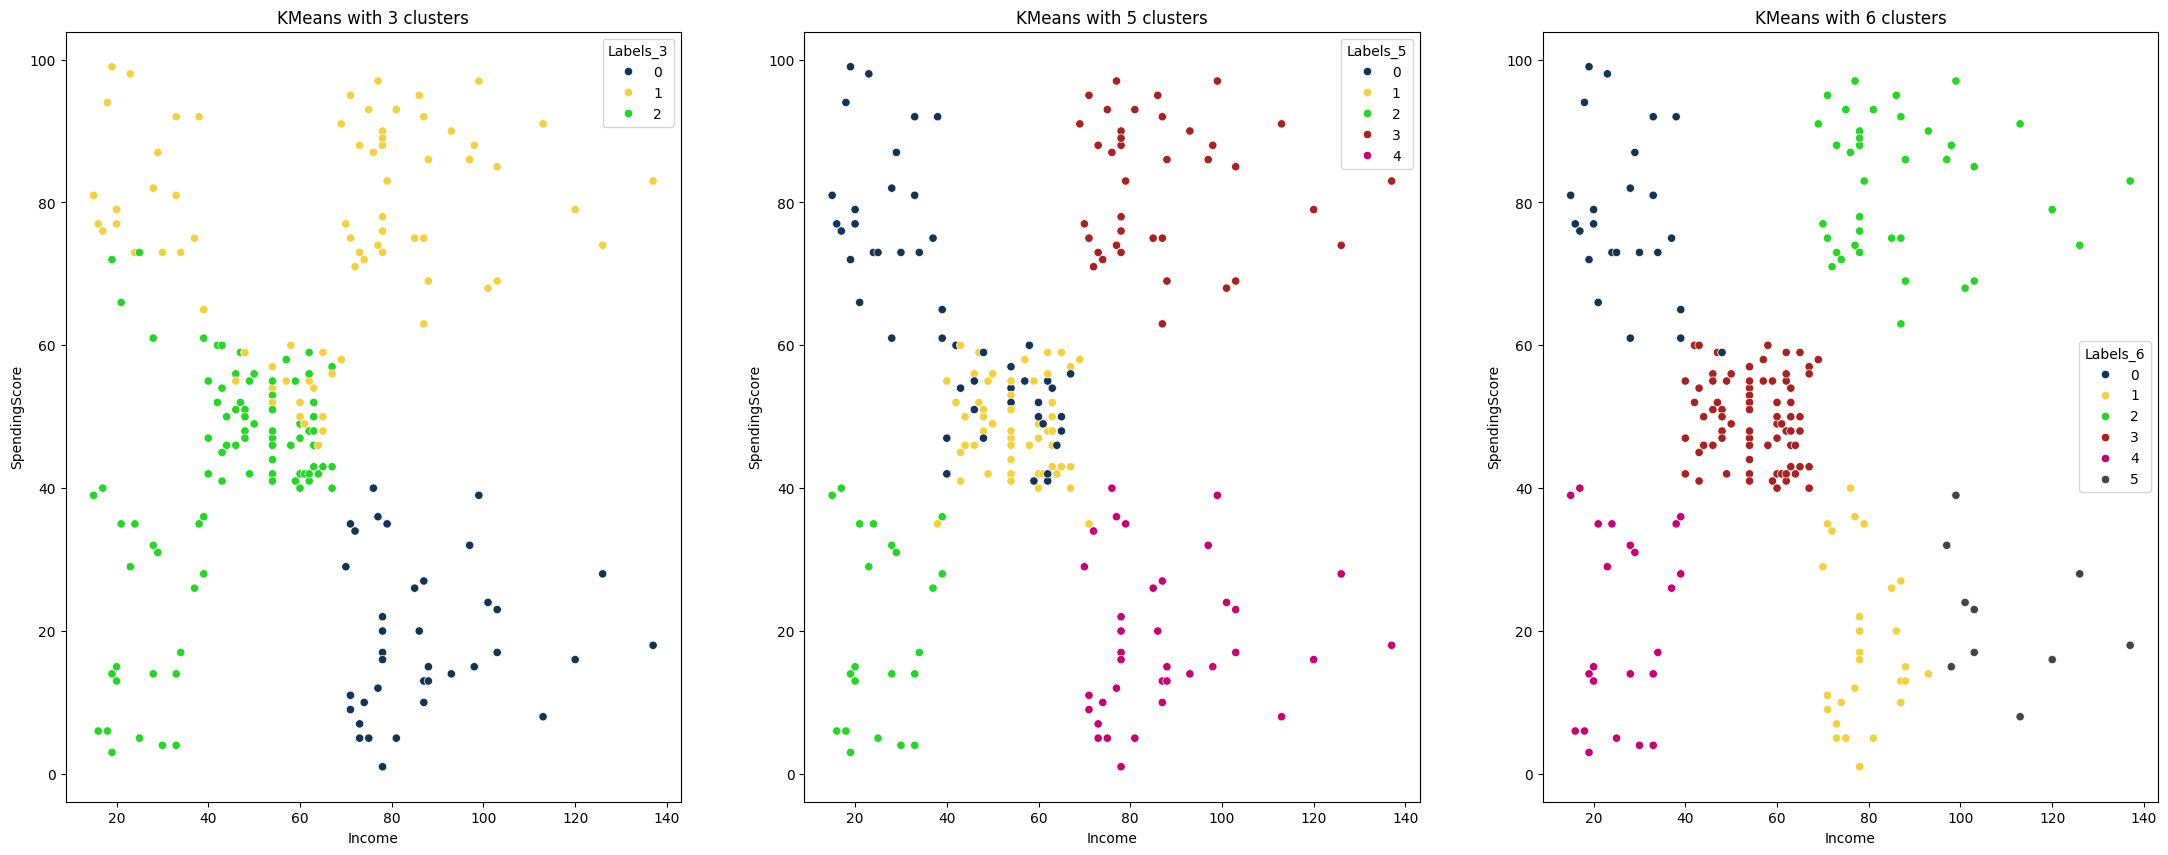

In [36]:
km_3 = KMeans(n_clusters=3).fit(X)
cluster_3_labels = km_3.labels_
X['Labels_3'] = cluster_3_labels

km_5 = KMeans(n_clusters=5).fit(X)
cluster_5_labels = km_5.labels_
X['Labels_5'] = cluster_5_labels

km_6 = KMeans(n_clusters=6).fit(X)
cluster_6_labels = km_6.labels_
X['Labels_6'] = cluster_6_labels

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(27, 10))

sns.scatterplot(data=X, x='Income', y='SpendingScore', hue=X['Labels_3'], palette=['#123456', '#f4d13b', '#22d822'], ax=ax1)
ax1.set_title("KMeans with 3 clusters")

sns.scatterplot(data=X, x='Income', y='SpendingScore', hue=X['Labels_5'], palette=['#123456', '#f4d13b', '#22d822', '#a92222', '#c90076'], ax=ax2)
ax2.set_title("KMeans with 5 clusters")

sns.scatterplot(data=X, x='Income', y='SpendingScore', hue=X['Labels_6'], palette=['#123456', '#f4d13b', '#22d822', '#a92222', '#c90076', '#444444'], ax=ax3)
ax3.set_title("KMeans with 6 clusters")

plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [37]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_3'], color_continuous_scale=['#123456', '#f4d13b', '#22d822'])
fig.show()

fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_5'], color_continuous_scale=['#123456', '#f4d13b', '#22d822', '#a92222', '#c90076'])
fig.show()

fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_6'], color_continuous_scale=['#123456', '#f4d13b', '#22d822', '#a92222', '#c90076', '#444444'])
fig.show()

# Виникла якась помилка з plotly, старався пофіксити, не вийшло :( 

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

**Висновки з завдання 10 - 11 (детальні)** 

1. 0-й клас характеризується низьким рівнем витрат та доходу. 1-й клас - низькі витрати при високому доході. 2-й клас - середні витрати та дохід. 3-й клас - високі витрати, але низький дохід. 4-й клас - високі витрати та високий дохід. 3 кластери для кластеризації будуть недостатньою кількістю. При огляді двовимірних діаграм розсіювання виходить, що 5 кластерів виглядають найбільш оптимально.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


[[  0.          42.10700654  33.03028913 ... 117.20068259 124.53112061
  130.23824323]
 [ 42.10700654   0.          75.04665216 ... 111.87939935 137.84411485
  122.45407302]
 [ 33.03028913  75.04665216   0.         ... 129.95768542 122.24156413
  143.84366514]
 ...
 [117.20068259 111.87939935 129.95768542 ...   0.          57.14892825
   14.35270009]
 [124.53112061 137.84411485 122.24156413 ...  57.14892825   0.
   65.0999232 ]
 [130.23824323 122.45407302 143.84366514 ...  14.35270009  65.0999232
    0.        ]]


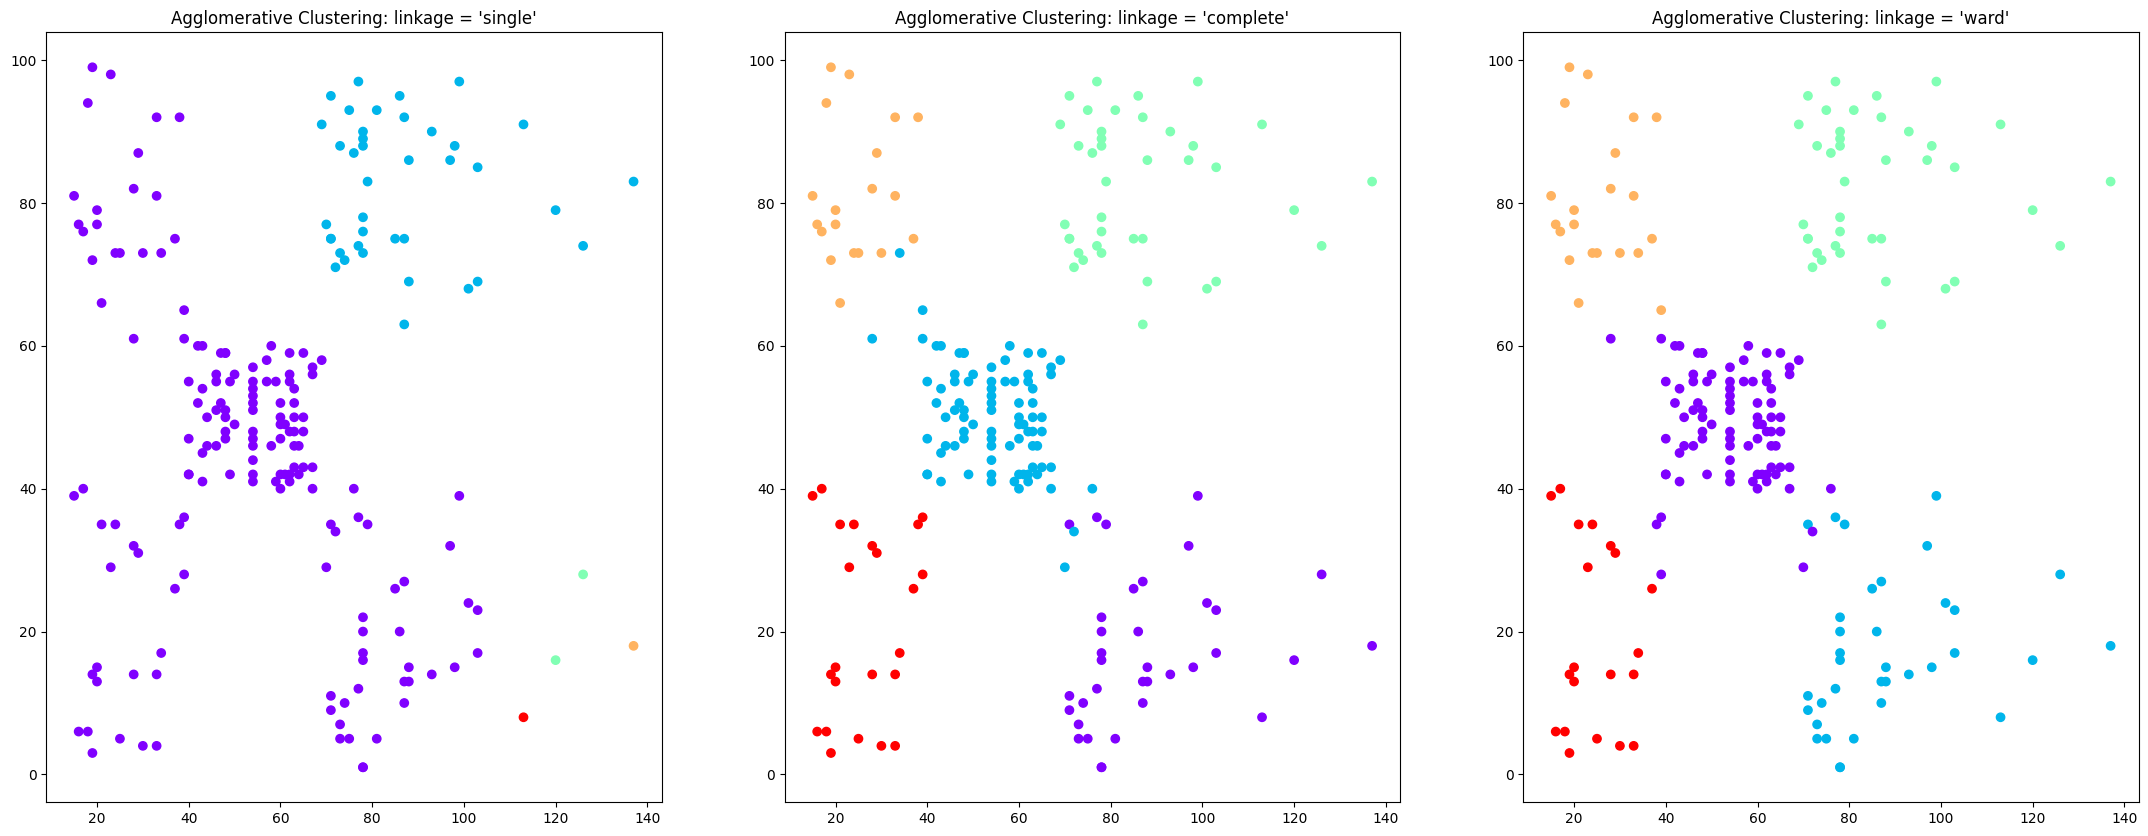

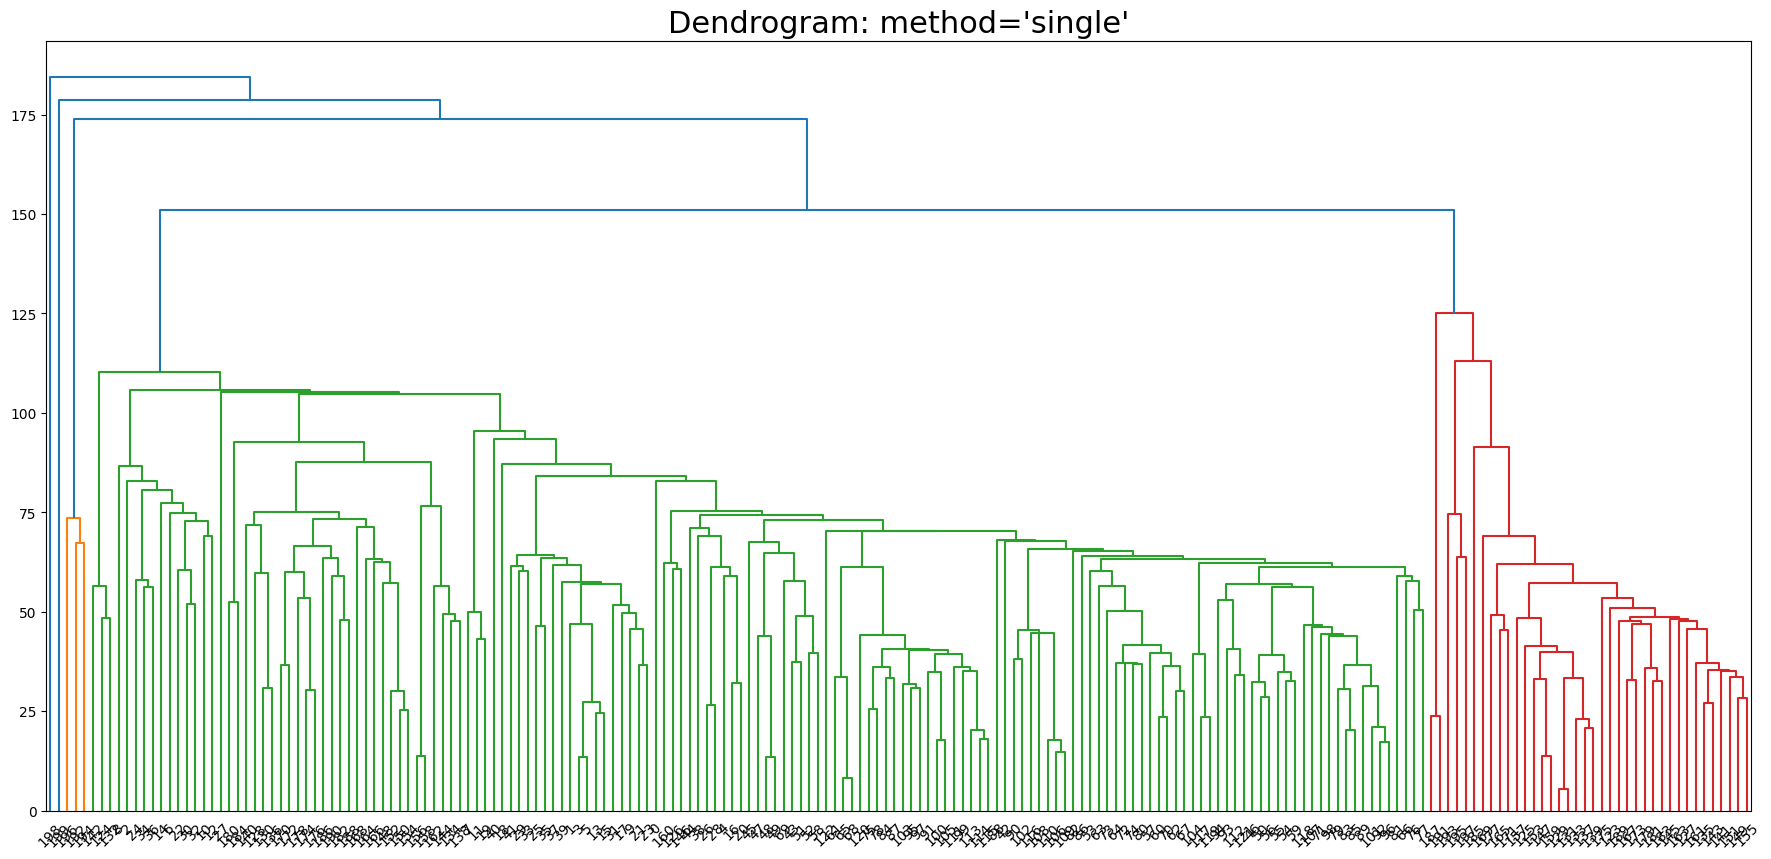

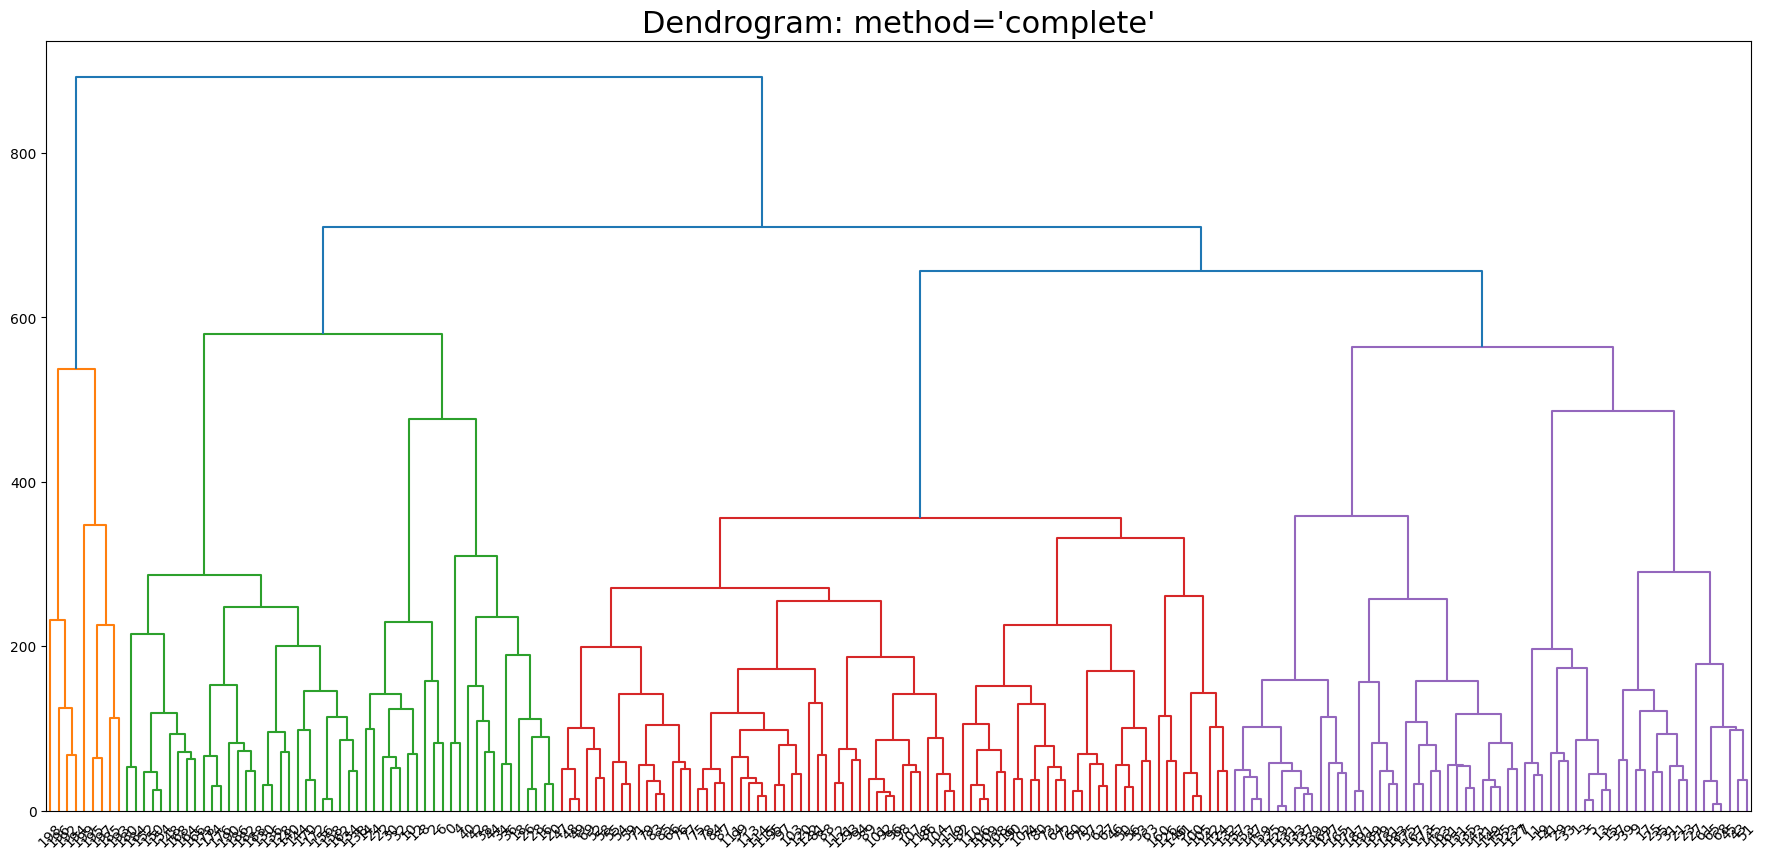

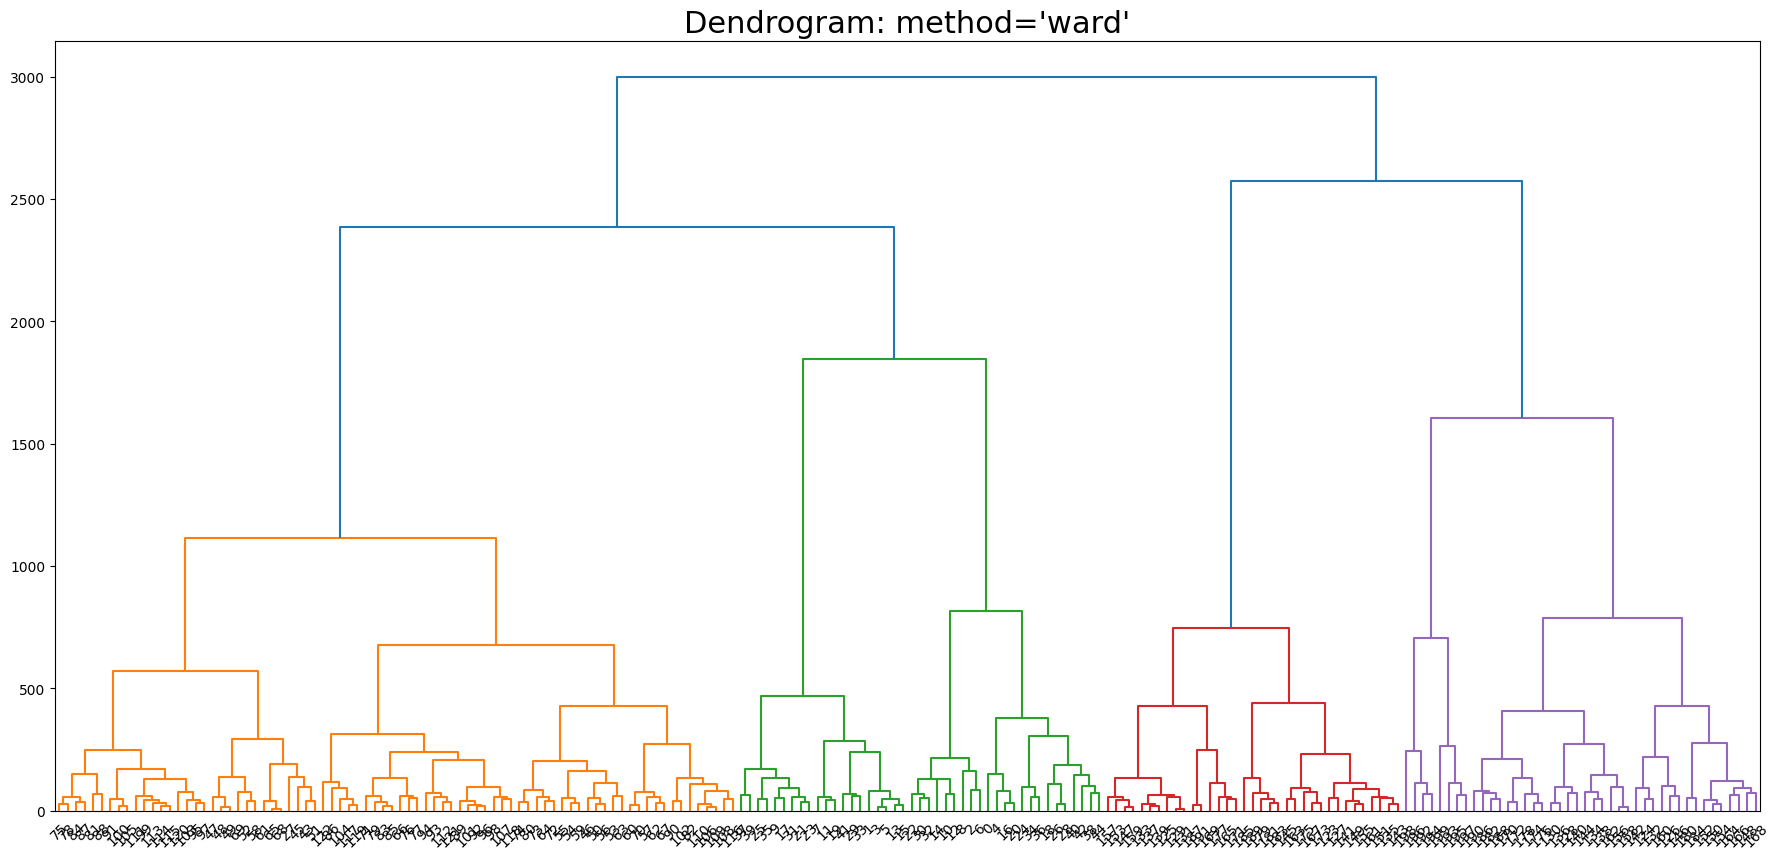

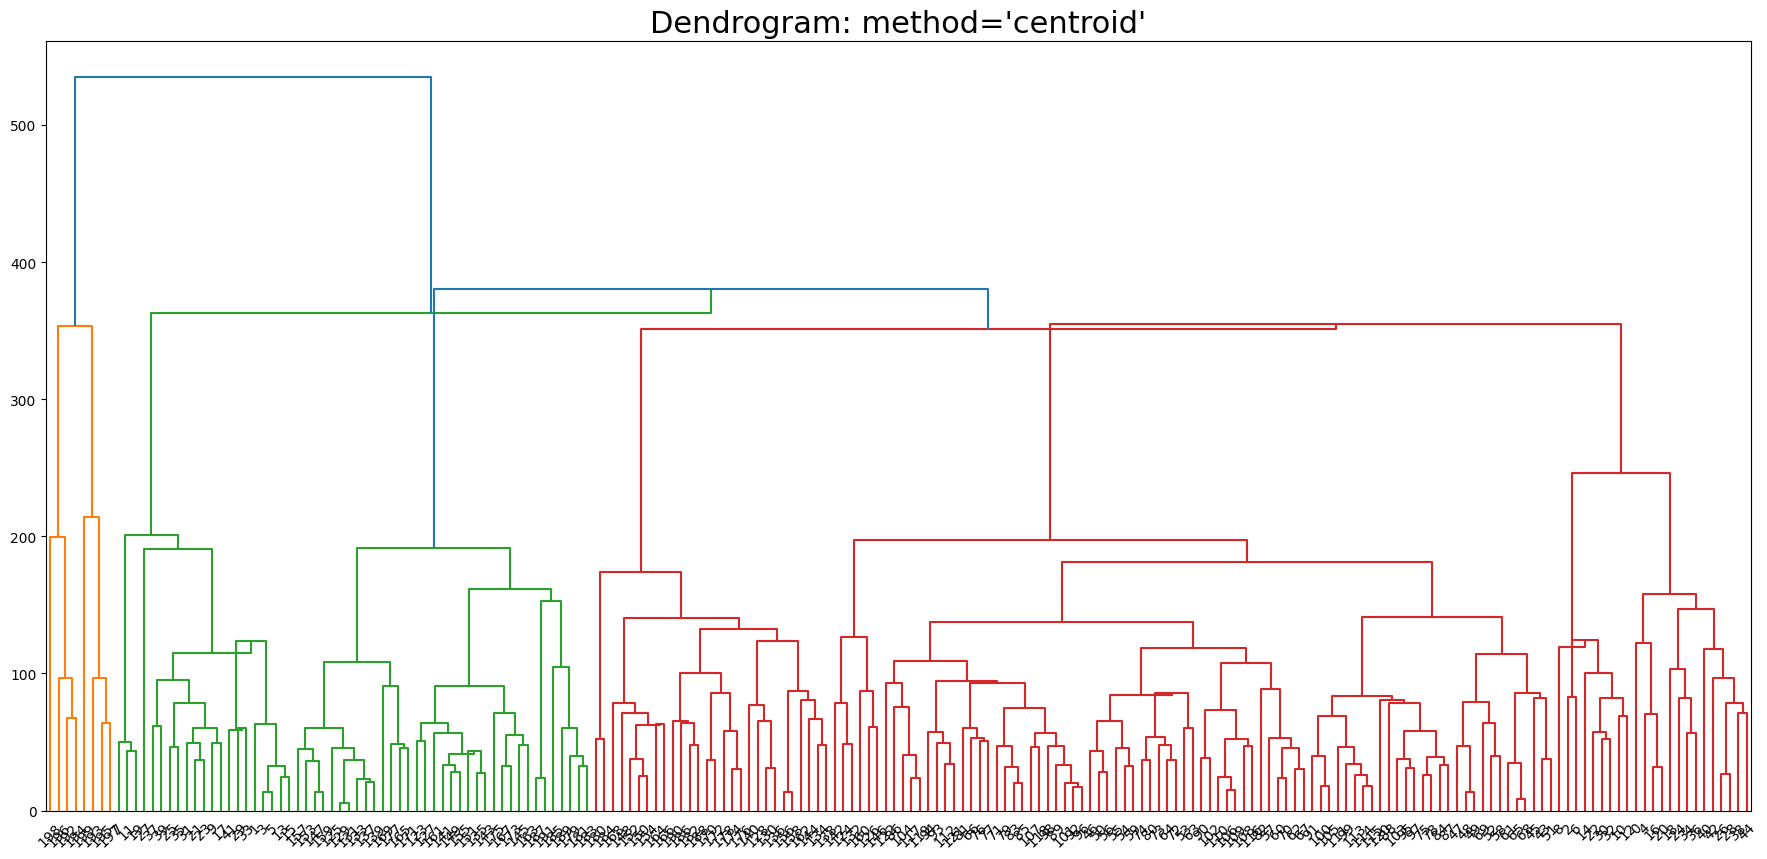

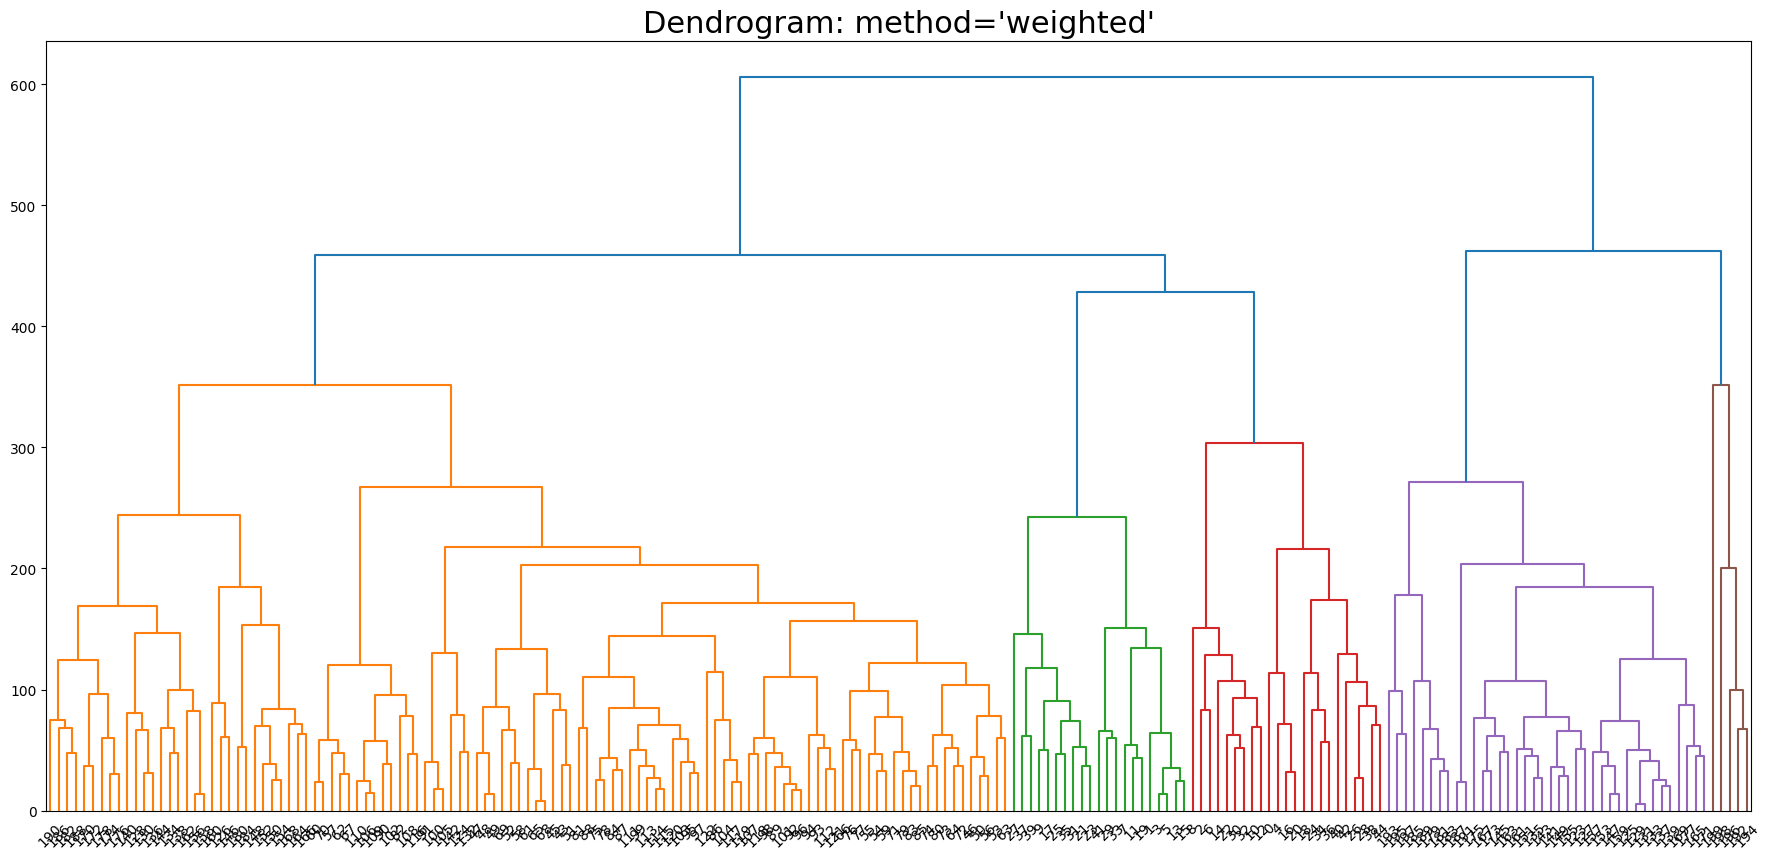

In [ ]:
d_matrix = distance_matrix(X, X)
print(d_matrix)

ac5_1 = AgglomerativeClustering(n_clusters=5, linkage='single')
ac5_2 = AgglomerativeClustering(n_clusters=5, linkage='complete')
ac5_3 = AgglomerativeClustering(n_clusters=5, linkage='ward')

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(27, 10))

ax1.scatter(X['Income'], X['SpendingScore'], c=ac5_1.fit_predict(X), cmap='rainbow')
ax1.set_title("Agglomerative Clustering: linkage = 'single'")

ax2.scatter(X['Income'], X['SpendingScore'], c=ac5_2.fit_predict(X), cmap='rainbow')
ax2.set_title("Agglomerative Clustering: linkage = 'complete'")

ax3.scatter(X['Income'], X['SpendingScore'], c=ac5_3.fit_predict(X), cmap='rainbow')
ax3.set_title("Agglomerative Clustering: linkage = 'ward'")

plt.show()

methods = ['single', 'complete', 'ward', 'centroid', 'weighted']
for method in methods:
    Z = hierarchy.linkage(d_matrix, method=method)

    fig = plt.figure(figsize=(22, 10))
    dendro = hierarchy.dendrogram(Z, leaf_rotation=45, leaf_font_size=10, orientation='top', p=5)

    plt.title(f"Dendrogram: method='{method}'", fontsize=22)
    plt.show()

**Висновки з завдання 12 (детальні)**

1. Використано 5 різних значень linkage для кластеризації: single , complete , ward , centroid та weighted. Серед них метод weighted найкраще розділив дані, об'єднавши їх у 5 кластерів ефективно. Тому надалі слід використовувати саме цю кількість класів для кластеризації.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

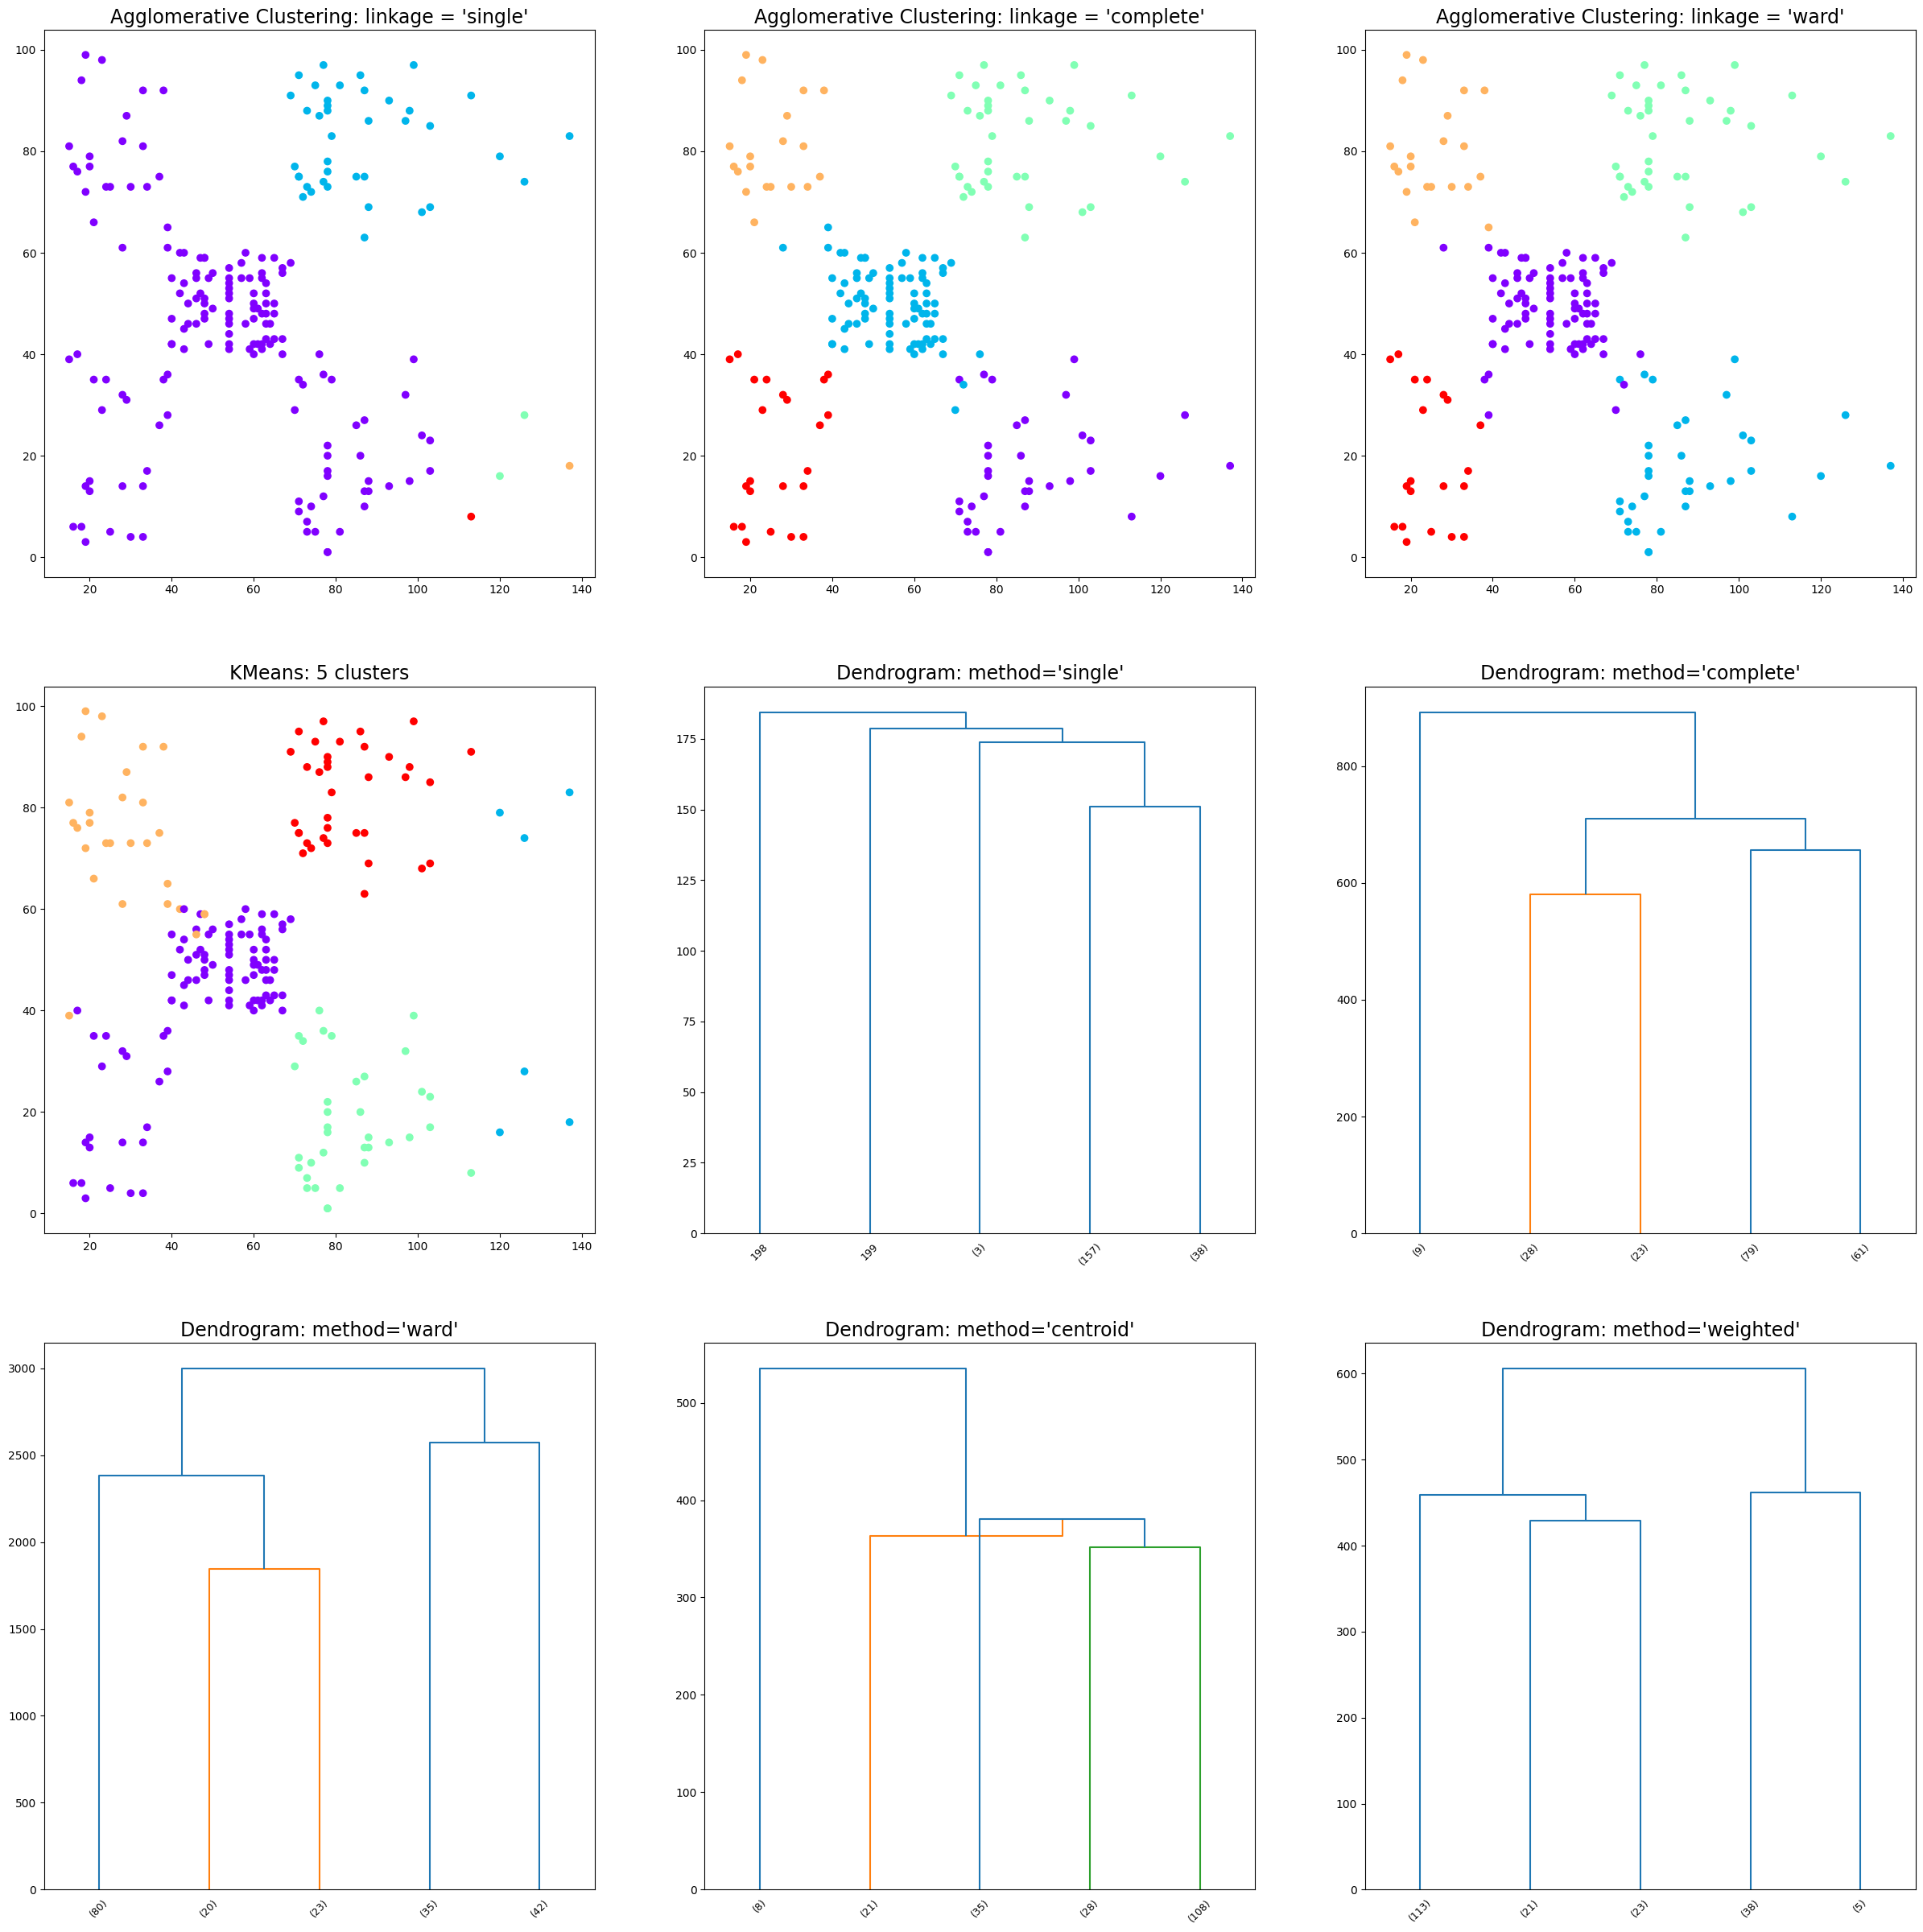

In [ ]:
ac5_1 = AgglomerativeClustering(n_clusters = 5, linkage='single')
ac5_2 = AgglomerativeClustering(n_clusters = 5, linkage='complete')
ac5_3 = AgglomerativeClustering(n_clusters = 5, linkage='ward')

km_5 = KMeans(n_clusters=5).fit(X)
X['Labels_5'] = km_5.labels_

Z_single = hierarchy.linkage(d_matrix, method='single')
Z_complete = hierarchy.linkage(d_matrix, method='complete')
Z_ward = hierarchy.linkage(d_matrix, method='ward')
Z_centroid = hierarchy.linkage(d_matrix, method='centroid')
Z_weighted = hierarchy.linkage(d_matrix, method='weighted')
 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(30, 30))

ax1.scatter(X['Income'], X['SpendingScore'], c = ac5_1.fit_predict(X), cmap='rainbow')
ax1.set_title("Agglomerative Clustering: linkage = 'single'", fontsize=17)

ax2.scatter(X['Income'], X['SpendingScore'], c = ac5_2.fit_predict(X), cmap='rainbow')
ax2.set_title("Agglomerative Clustering: linkage = 'complete'", fontsize=17)

ax3.scatter(X['Income'], X['SpendingScore'], c = ac5_3.fit_predict(X), cmap='rainbow')
ax3.set_title("Agglomerative Clustering: linkage = 'ward'", fontsize=17)

ax4.scatter(X['Income'], X['SpendingScore'], c = X['Labels_5'], cmap='rainbow')
ax4.set_title("KMeans: 5 clusters", fontsize=17)

dendro1 = hierarchy.dendrogram(Z_single, leaf_rotation=45, leaf_font_size=9, orientation='top', p=5, ax=ax5, truncate_mode='lastp')
ax5.set_title("Dendrogram: method='single'", fontsize=17)

dendro2 = hierarchy.dendrogram(Z_complete, leaf_rotation=45, leaf_font_size=9, orientation='top', p=5, ax=ax6, truncate_mode='lastp')
ax6.set_title("Dendrogram: method='complete'", fontsize=17)

dendro3 = hierarchy.dendrogram(Z_ward, leaf_rotation=45, leaf_font_size=9, orientation='top', p=5, ax=ax7, truncate_mode='lastp')
ax7.set_title("Dendrogram: method='ward'", fontsize=17)

dendro4 = hierarchy.dendrogram(Z_centroid, leaf_rotation=45, leaf_font_size=9, orientation='top', p=5, ax=ax8, truncate_mode='lastp')
ax8.set_title("Dendrogram: method='centroid'", fontsize=17)

dendro5 = hierarchy.dendrogram(Z_weighted, leaf_rotation=45, leaf_font_size=9, orientation='top', p=5, ax=ax9, truncate_mode='lastp')
ax9.set_title("Dendrogram: method='weighted'", fontsize=17)

plt.show()

**Висновки з завдання 13 (детальні)**

1. Агломеративна кластеризація об'єднує менші групи даних в більші. Метод single показав погані результати, згрупувавши більшість елементів у одну групу (фіолетовий колір), деякі в іншу (блакитний кол.), та лише по 1-2 елементи у три інші групи (червоний, зелений та жовтий кольори). Методи complete та ward розділили дані майже однаково, за винятком деяких перестановок кольорів. Проте, метод complete додатково включив два об'єкти з лівого верхнього класу до центральної групи, відмінно від методу ward. Ці методи виявилися найточнішими. Кластеризація K-means розбиває вибірку на певну кількість кластерів, вибрану користувачем, розміщує центри кластерів і знаходить відстань між усіма спостереженнями та центрами. Під час кожної ітерації координати центрів уточнюються до тих пір, поки дані не будуть розділені найбільш точно. У випадку кластеризація K-means розділила дані майже так само, як метод агломеративного кластерування. На візуалізації можна помітити мінімальну відмінність у результатах між двома методами. Проте, дані так само ефективно розділені на 5 кластерів.Дендрограми - це метод візуалізації, який демонструє, як найменші кластери даних об'єднуються в більші, утворюючи дерево кластеризації. З усіх п'яти методів, які використали для побудови дендрограм, найкраще себе показав метод Варда. Він розділив дані більш рівномірно на 5 кластерів. Інші методи виявилися менш точними, створивши кластери занадто великими або занадто малими. Оскільки ми вже провели кластеризацію за допомогою попередніх підходів, можна зробити висновок, що саме метод Варда підходить найкраще.